![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

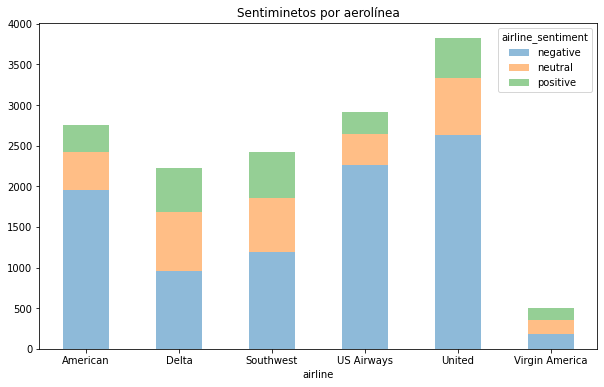

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
!nltk.download()

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
word_vectorizer = CountVectorizer()
word_vectorizer.fit(X_train)
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators=7, random_state=1, n_jobs=-1)

classifier.fit(train_word_features, y_train)
y_pred = classifier.predict(test_word_features)

accuracy_1=accuracy_score(y_test, y_pred)
print('accuracy de random forest con libreria: ', accuracy_1)

accuracy de random forest con libreria:  0.7328228476821192


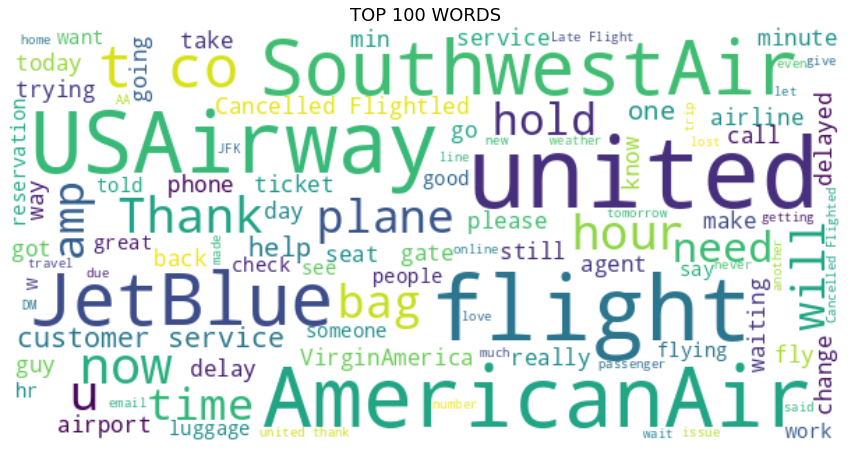

In [13]:
# otra buena práctica es realizar la impresión de un wordcloud, en este caso se puede observar que el nombre de la aerolinea es 
# dominante
from wordcloud import WordCloud 
long_t = (" ").join(text for text in X_train)
wordcloud = WordCloud(max_font_size=70, max_words=100,background_color="white", width=600, height=300).generate(long_t)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("TOP 100 WORDS", fontsize=18)
plt.show()

In [14]:
# se realizo el ejercicio de retirar los nombre de la aerolinea de las stop words,
# pero el resultado no fue óptimo

# antes de iniciar es importante realizar una limpieza del corpus, buscando eliminar numeros, signos etc. 

import re
from sklearn import metrics

def cleanText(text):
    text = text.lower()
    text = re.sub('[^A-Za-z\']',' ',text)
    text = re.sub('\s*\\b([a-z]|[a-z]{2})\\b','', text).strip()
    text = " ".join(text.split())
    return text 

X_train = X_train.apply(cleanText)

# dado que el punto no prohibe el uso de n_grams se usarán bigramas
vect_1 = CountVectorizer(dtype=np.int8)
X_dtm_A = vect_1.fit_transform(X_train)

# se realizo el ejercicio de retirar los nombre de la aerolinea de las stop words,
# pero el resultado no fue óptimo

RFC = RandomForestClassifier(random_state=0, n_jobs=-1)
RFC.fit(X_dtm_A,y_train)
X_test = X_test.apply(cleanText)
X_dtm_A_test = vect_1.transform(X_test)

pred = RFC.predict(X_dtm_A_test)
target_names = ["Positive","Negative","Neutral"]
print(metrics.classification_report(y_true=y_test,y_pred=pred, labels=y_test.unique(), target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.82      0.52      0.64       763
    Negative       0.80      0.94      0.86      3085
     Neutral       0.65      0.45      0.53       984

    accuracy                           0.78      4832
   macro avg       0.76      0.64      0.68      4832
weighted avg       0.77      0.78      0.76      4832



### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
word_vectorizer = CountVectorizer(stop_words = 'english')
word_vectorizer.fit(X_train)
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators=7, random_state=1, n_jobs=-1)

classifier.fit(train_word_features, y_train)
y_pred = classifier.predict(test_word_features)

accuracy_2=accuracy_score(y_test, y_pred)
print('accuracy de random forest con libreria: ', accuracy_2)

accuracy de random forest con libreria:  0.7208195364238411


In [16]:
target_names = ["Positive","Negative","Neutral"]
print(metrics.classification_report(y_true=y_test,y_pred=y_pred, labels=y_test.unique(), target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.66      0.53      0.59       763
    Negative       0.81      0.84      0.82      3085
     Neutral       0.48      0.50      0.49       984

    accuracy                           0.72      4832
   macro avg       0.65      0.62      0.63      4832
weighted avg       0.72      0.72      0.72      4832



### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 3
import nltk       
from nltk.stem import WordNetLemmatizer 

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

word_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
word_vectorizer.fit(X_train)
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators=7, random_state=1, n_jobs=-1)

classifier.fit(train_word_features, y_train)
y_pred = classifier.predict(test_word_features)

accuracy_3=accuracy_score(y_test, y_pred)
print('accuracy de random forest con libreria: ', accuracy_3)

[nltk_data] Downloading package wordnet to /home/ricardo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ricardo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ricardo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


accuracy de random forest con libreria:  0.7415149006622517


In [18]:
print(metrics.classification_report(y_true=y_test,y_pred=y_pred, labels=y_test.unique(), target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.72      0.48      0.58       763
    Negative       0.79      0.90      0.84      3085
     Neutral       0.54      0.44      0.48       984

    accuracy                           0.74      4832
   macro avg       0.68      0.61      0.63      4832
weighted avg       0.73      0.74      0.73      4832



### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 4

wordnet_lemmatizer = WordNetLemmatizer()

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

word_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words = 'english')
word_vectorizer.fit(X_train)
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators=7, random_state=1, n_jobs=-1)

classifier.fit(train_word_features, y_train)
y_pred = classifier.predict(test_word_features)

accuracy_4=accuracy_score(y_test, y_pred)
print('accuracy de random forest con libreria: ', accuracy_4)

accuracy de random forest con libreria:  0.7272350993377483


In [20]:
print(metrics.classification_report(y_true=y_test,y_pred=y_pred, labels=y_test.unique(), target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.70      0.48      0.57       763
    Negative       0.79      0.87      0.83      3085
     Neutral       0.50      0.47      0.48       984

    accuracy                           0.73      4832
   macro avg       0.66      0.61      0.63      4832
weighted avg       0.72      0.73      0.72      4832



### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

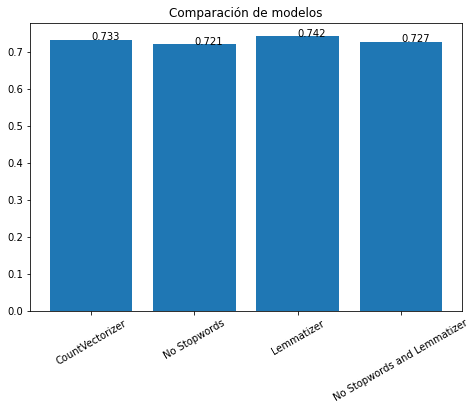

In [21]:
# Celda 5

accuracy_1 = round(accuracy_1, 3)
accuracy_2 = round(accuracy_2, 3)
accuracy_3 = round(accuracy_3, 3)
accuracy_4 = round(accuracy_4, 3)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Comparación de modelos')
ejeX = ['CountVectorizer', 'No Stopwords', 'Lemmatizer', 'No Stopwords and Lemmatizer']
ejeY = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
ax.bar(ejeX, ejeY)
plt.xticks(rotation=30)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

Comparar los modelos por un accuracy global puede ser complejo ya que se manejan 3 clases y los datos están muy
inbalanceados. Para Comparar los modelos se usa recall en la visualización siguiente.

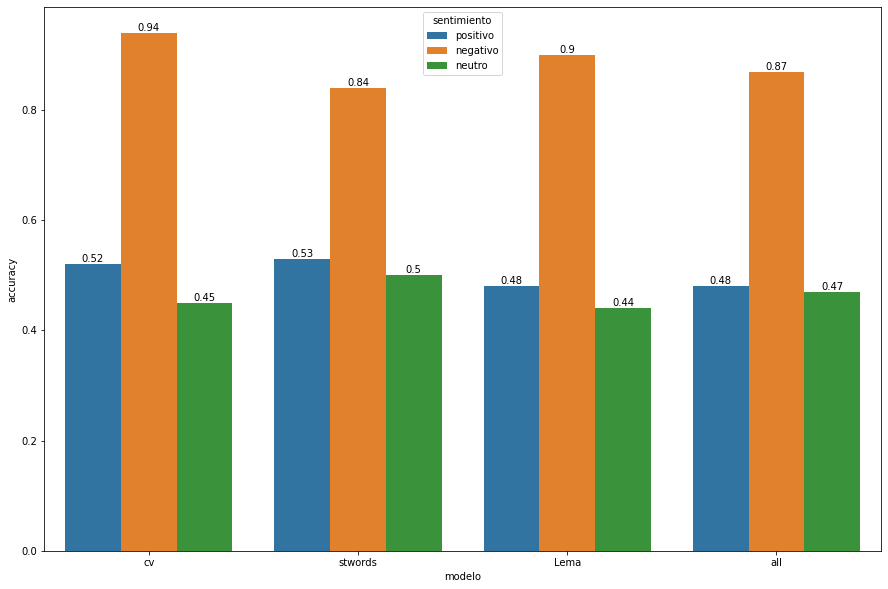

In [22]:
d = [["positivo",0.52,"cv"],
     ["negativo",0.94,"cv"],
     ["neutro",0.45,"cv"],
     ["positivo",0.53,"stwords"],
     ["negativo",0.84,"stwords"],
     ["neutro",0.50,"stwords"],
     ["positivo",0.48,"Lema"],
     ["negativo",0.90,"Lema"],
     ["neutro",0.44,"Lema"],
     ["positivo",0.48,"all"],
     ["negativo",0.87,"all"],
     ["neutro",0.47,"all"]]
df_accur = pd.DataFrame(d, columns=["sentimiento","accuracy","modelo"])
plt.figure(figsize=(15,10))
ax = sns.barplot(x="modelo",y="accuracy",data=df_accur, hue="sentimiento")
for container in ax.containers:
    ax.bar_label(container)

De acuerdo a la gráfica los valores no son muy distintos en los diferentes métodos. Para escoger cuál tendría
el mejor desempeño se tendría que hacer énfasis en la prioridad para predecir, si es la clase positiva, negativa
o neutra, debido a que están inbalanceadas. Si la prioridad es predecir sentimieno negativo se puede escoger
count vectorizer (cv). Si la prioridad es predecir sentimiento positivo se escoge el modelo sin stopwords.